In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./CancerPScreenRaw2020.csv')
#Converting to binomial
data.Class = [x if x != 2 else 1 for x in data.Class]

In [54]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,137.573925,151.719162,0.596020,23.629505,7.030695,0.580842,20.306659,40.032476,59.758293,0.0
1,116.496435,144.131710,0.559442,21.142454,7.302688,1.792108,16.222173,30.652238,45.082303,0.0
2,226.076027,194.559764,0.594095,29.937782,9.526411,10.851462,28.283713,45.715964,63.148214,1.0
3,100.359149,134.248998,0.555051,20.580689,5.855500,9.848190,20.564519,31.280848,41.997178,1.0
4,131.986704,150.623324,0.579484,23.986106,7.273814,30.388115,22.448860,14.509605,6.570351,1.0


In [3]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
info = pp.ProfileReport(data)
info.to_file('cancer.html')
display(IFrame('cancer.html', width=900, height=350))

In [145]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,194.425031,181.393477,0.644245,27.056120,9.136551,13.461035,25.025941,36.590846,48.155751,0.666667
std,80.563924,39.287221,0.081287,5.351494,2.383299,10.417201,5.467568,15.071653,26.463169,0.471545
min,77.506035,106.435661,0.451309,16.586642,4.780299,0.404557,14.655575,-18.907700,-59.797074,0.000000
25%,125.907412,150.891002,0.589447,23.074370,7.241293,5.520057,20.870618,27.342856,32.990484,0.000000
50%,174.278814,175.405766,0.641544,26.228877,8.846012,10.918068,23.856820,36.551277,50.131199,1.000000
75%,252.294753,207.307145,0.688508,30.265601,10.713682,18.928788,28.777564,46.142815,65.283284,1.000000
max,476.426612,322.386873,0.946335,46.666363,17.613278,62.871048,45.115158,85.250094,125.385029,1.000000


In [6]:
#Check if dataset is balanced or not
data.Class.value_counts()

1.0    1120
0.0     560
Name: Class, dtype: int64

In [7]:
#Detecting all the null values 
data.isnull().sum()

V1       10
V2       10
V3       10
V4       10
V5       10
V6       10
V7       10
V8       10
V9       10
Class    10
dtype: int64

In [4]:
#Drop rows where all values are null 
data=data.dropna(how='all').reset_index(drop=True)

In [1]:
data.info()

NameError: name 'data' is not defined

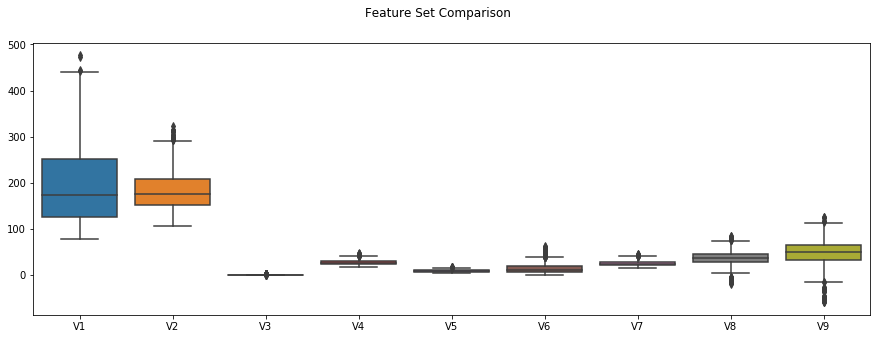

In [10]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=data.drop('Class',axis=1))
plt.show()

In [11]:
#Find Independent Column Correlations# Plot Heatmap
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data,0.8)
print('Correlated columns @ 0.9:', col)

Correlated columns @ 0.9: [('V2', 'V1'), ('V4', 'V1'), ('V4', 'V2'), ('V5', 'V1'), ('V5', 'V2'), ('V5', 'V4'), ('V7', 'V1'), ('V7', 'V2'), ('V7', 'V4'), ('V7', 'V5'), ('V9', 'V8')]


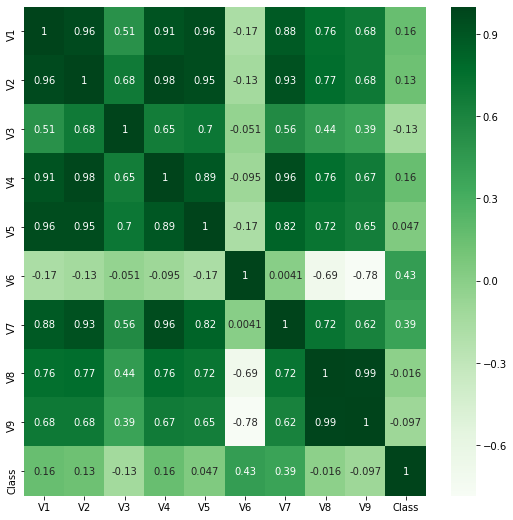

In [4]:
# Visualization of Correlations
plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

In [5]:
#Detecting outliers 

#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(data.drop('Class',axis=1),0,list(data.drop('Class',axis=1)))
data.drop('Class',axis=1).loc[Outliers_to_drop]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
605,476.426612,322.386873,0.850293,46.666363,17.256893,23.699211,43.219864,62.740516,82.261169
609,442.081040,309.071137,0.857025,42.796644,16.176084,28.992396,41.472420,53.952445,66.432469
678,443.833590,309.803533,0.857603,43.206179,17.007015,37.726836,41.485828,45.244820,49.003812
689,472.345889,314.954572,0.883631,45.073220,17.613278,27.259269,43.288320,59.317371,75.346422
602,393.590804,293.177715,0.849333,44.599281,14.984819,5.475096,41.151293,76.827490,112.503687
619,398.562429,299.628865,0.823253,43.948256,14.680160,12.209611,42.037397,71.865182,101.692968
629,390.293723,297.470681,0.817596,45.059244,13.669262,4.980222,45.115158,85.250094,125.385029
633,393.590804,293.177715,0.849333,44.599281,14.984819,5.475096,41.151293,76.827490,112.503687
641,390.293723,297.470681,0.817596,45.059244,13.669262,4.980222,45.115158,85.250094,125.385029
656,397.316597,293.177715,0.856254,42.253631,15.768422,10.304523,41.445612,72.586701,103.727791


In [5]:
#Create x and y variables
x = data.drop('Class', axis=1)
Y = data['Class']

#Create Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.20,stratify=Y,random_state = 100)

In [6]:
#Current Class Balance - Test Data
print('Current - Class Split')
num_zeros = (y_train == 1.0).sum()
num_ones = (y_train == 0.0).sum()
print('Class 1.0 -',  num_zeros)
print('Class 0.0 -',  num_ones)

Current - Class Split
Class 1.0 - 896
Class 0.0 - 448


In [7]:
#Balance the class using SMOTE
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_sample(x_train,y_train)

#Class Balance - Test Data
print('SMOTE - Class Split')
num_zeros = (y_train_smt == 1.0).sum()
num_ones = (y_train_smt == 0.0).sum()
print('Class 1.0 -',  num_zeros)
print('Class 0.0 -',  num_ones)

Using TensorFlow backend.


SMOTE - Class Split
Class 1.0 - 896
Class 0.0 - 896


In [8]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)
x_2 = sc.fit_transform(x)

# Standard Model

In [9]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
#Standard model
accuracy_val = [] #to store accuracy values for different k
for K in range(10):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(x_train2, y_train_smt)  #fit the model
    y_pred=model.predict(x_test2) #make prediction on test set
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    accuracy_val.append(accuracy) #store accuracy values
    print('Accuracy value for k= ' , K , 'is:',accuracy)

Accuracy value for k=  1 is: 0.9732142857142857
Accuracy value for k=  2 is: 0.9761904761904762
Accuracy value for k=  3 is: 0.9702380952380952
Accuracy value for k=  4 is: 0.9583333333333334
Accuracy value for k=  5 is: 0.9672619047619048
Accuracy value for k=  6 is: 0.9523809523809523
Accuracy value for k=  7 is: 0.9434523809523809
Accuracy value for k=  8 is: 0.9464285714285714
Accuracy value for k=  9 is: 0.9404761904761905
Accuracy value for k=  10 is: 0.9375


In [1]:
#KNN Model for best neighbors i.e. 2 
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(x_train2, y_train_smt)  #fit the model
y_pred=model.predict(x_test2) #make prediction on test set
    
#confusion matrix for K=3
from sklearn.metrics import confusion_matrix
print('\nEstimator: KNN')
target_names=['Class 0','Class 1']
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred,target_names=target_names))

NameError: name 'KNeighborsClassifier' is not defined

In [25]:
#Script for RF,NN

#Create Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix  

#multiple model in the for loop
for name,method in [('Random Forest Classifier', RandomForestClassifier(n_estimators=1000, random_state=100)),
                    ('Neural Network',MLPClassifier(hidden_layer_sizes=(12,8,1), max_iter=1000,random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    target_names=['Class 0','Class 1']
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))
    


Estimator: Random Forest Classifier
[[105   7]
 [  0 224]]
              precision    recall  f1-score   support

     Class 0       1.00      0.94      0.97       112
     Class 1       0.97      1.00      0.98       224

    accuracy                           0.98       336
   macro avg       0.98      0.97      0.98       336
weighted avg       0.98      0.98      0.98       336


Estimator: Neural Network
[[101  11]
 [  0 224]]
              precision    recall  f1-score   support

     Class 0       1.00      0.90      0.95       112
     Class 1       0.95      1.00      0.98       224

    accuracy                           0.97       336
   macro avg       0.98      0.95      0.96       336
weighted avg       0.97      0.97      0.97       336



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [1]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='liblinear',class_weight='balanced',
                                               random_state=100))])
pipeline.insert(0,pipe_logreg)

# Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1', 'l2']}
modelpara.insert(0,param_gridlogreg)

NameError: name 'LogisticRegression' is not defined

# Learning Curve

In [32]:

#Define Plot for learning curve

from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(x_train2, y_train_smt)

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_shuffle, 
                                                            y=y_shuffle,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()

Random Forest Classifier - Learning Curve


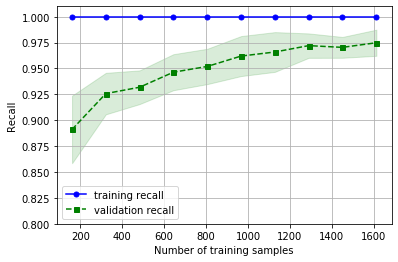

In [33]:
#Plot Learning Curve
print('Random Forest Classifier - Learning Curve')
plot_learning_curves(pipe_rdf)

In [34]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Random Forest',pipe_rdf))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Weighted')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train_smt,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))

Model Evaluation - Recall Weighted
Random Forest 0.97 +/- 0.01


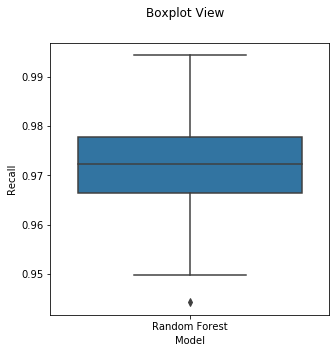

In [35]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

# Optimized Model

In [36]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=1, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train2, y_train_smt)
    model = gs_clf.best_estimator_
    
    #Nested CV
    x_2 = sc.fit_transform(x)
    scoreACC = cross_val_score(gs_clf, x_2, Y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)
    
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    
    #Output Validation Statistics
    
    print('\nBest Parameters:',bestpara)
    target_names=['Class 0','Class 1']
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')
        

In [37]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

Best Parameters: {'clf__bootstrap': False, 'clf__max_features': 'auto', 'clf__n_estimators': 100}

 [[103   9]
 [  0 224]]

               precision    recall  f1-score   support

     Class 0       1.00      0.92      0.96       112
     Class 1       0.96      1.00      0.98       224

    accuracy                           0.97       336
   macro avg       0.98      0.96      0.97       336
weighted avg       0.97      0.97      0.97       336


NestedCV Accuracy(weighted

ROC Curve


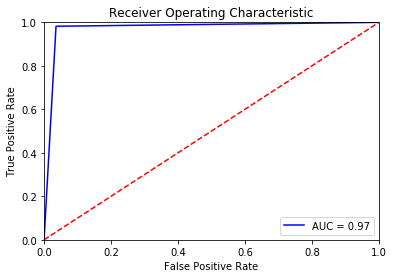

In [38]:
#Transform the variables into binary (0,1) - ROC Curve
from sklearn import preprocessing
Forecast1=pd.DataFrame(y_pred)
Outcome1=pd.DataFrame(y_test)
lb1 = preprocessing.LabelBinarizer()
OutcomeB1 =lb1.fit_transform(Outcome1)
ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
roc_auc = metrics.auc(fpr, tpr)
print('ROC Curve')
    #Plot the ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()